In [12]:
from IPython.display import Markdown
Markdown("""
# 📊 Customer Churn EDA  
**Goal:** Understand the data, discover patterns behind customer churn, and prepare for predictive modeling.

*Dataset Source:* [Kaggle - Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)
""")


# 📊 Customer Churn EDA  
**Goal:** Understand the data, discover patterns behind customer churn, and prepare for predictive modeling.

*Dataset Source:* [Kaggle - Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)


In [3]:

import pandas as pd
import numpy as np

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Shape: {df.shape}")
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


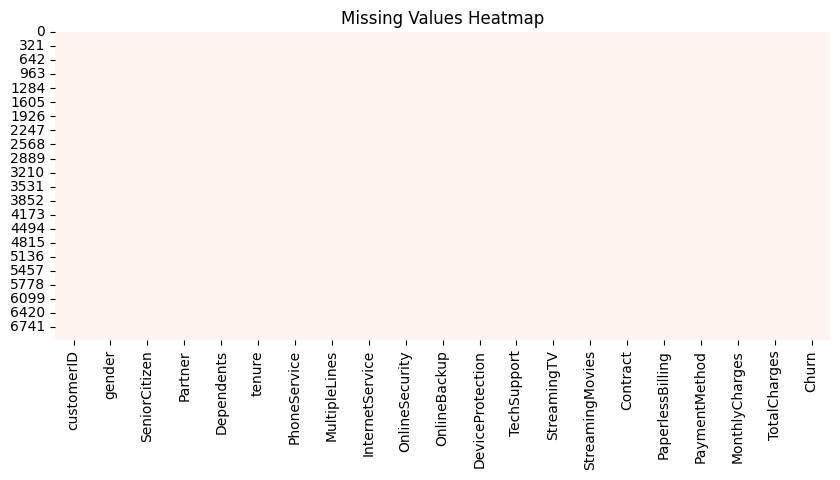

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
# Check missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

# Unique values per column
df.nunique()


In [ ]:
# 4. Data Cleaning

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df.drop('customerID', axis=1, inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


/var/folders/s8/3gktf4cx0z7cx_3npd6prb2c0000gn/T/ipykernel_21209/3067820197.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


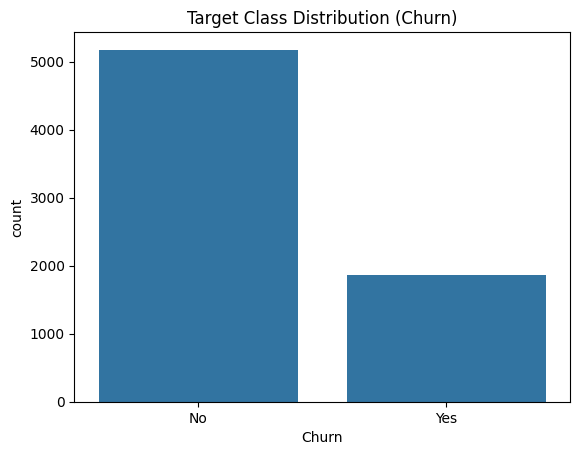

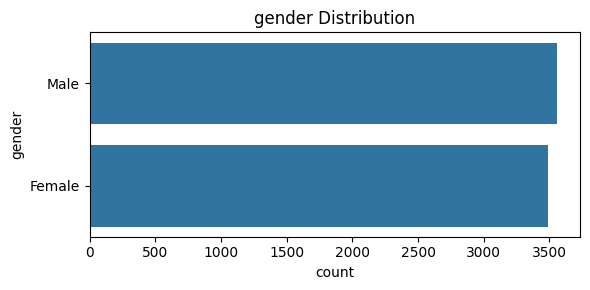

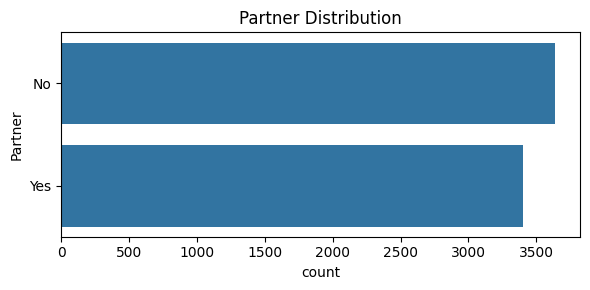

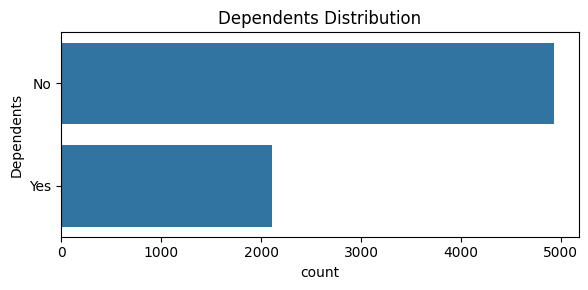

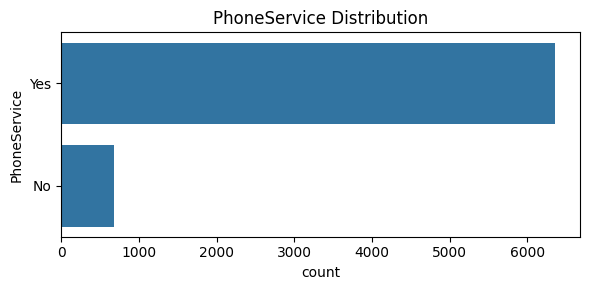

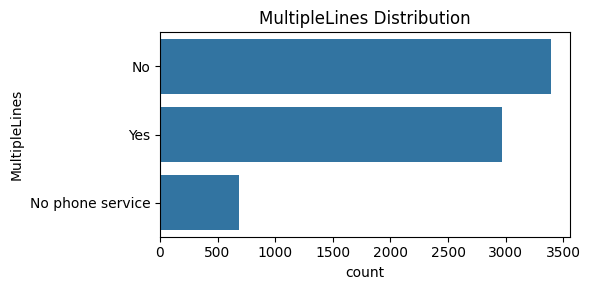

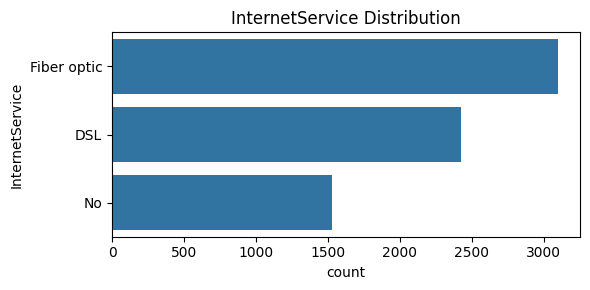

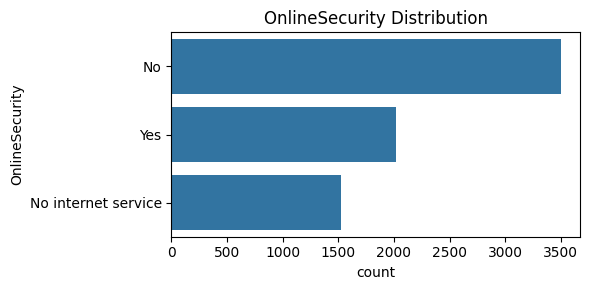

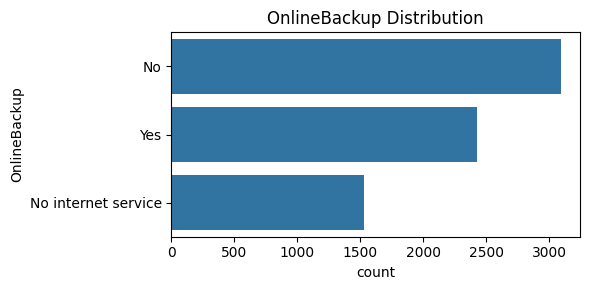

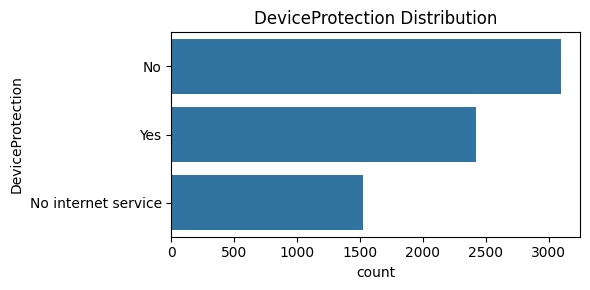

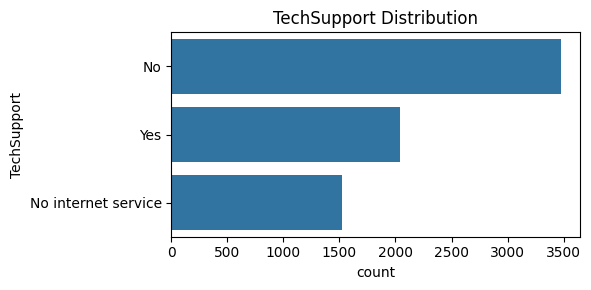

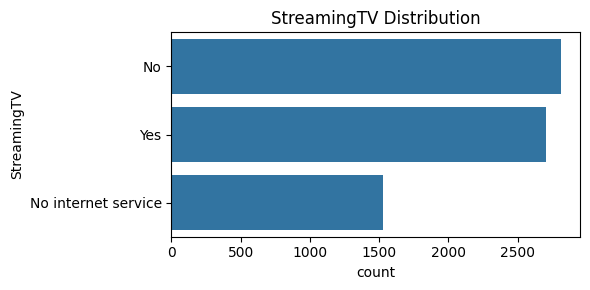

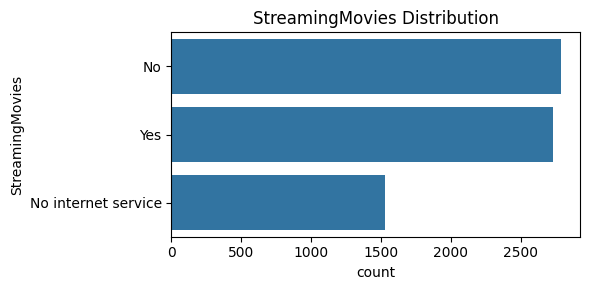

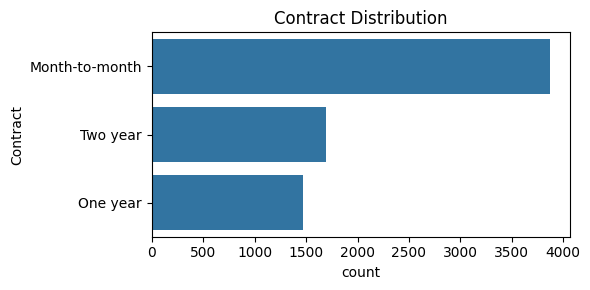

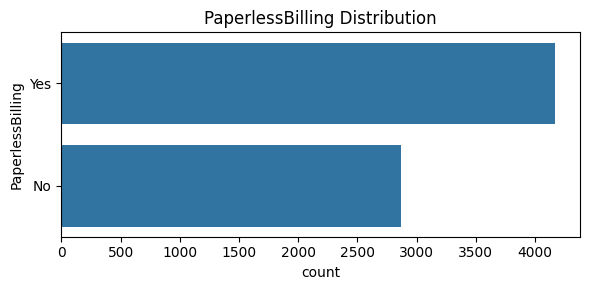

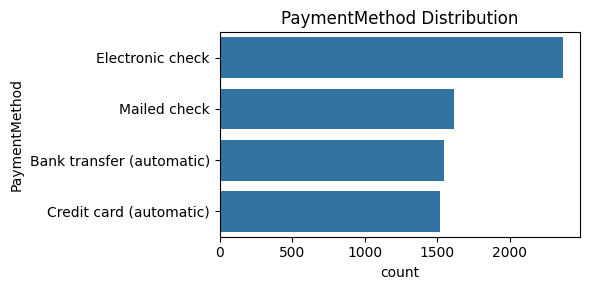

In [8]:
# 5. Univariate Analysis

sns.countplot(x='Churn', data=df)
plt.title("Target Class Distribution (Churn)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

cat_features = df.select_dtypes(include='object').columns

for col in cat_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()


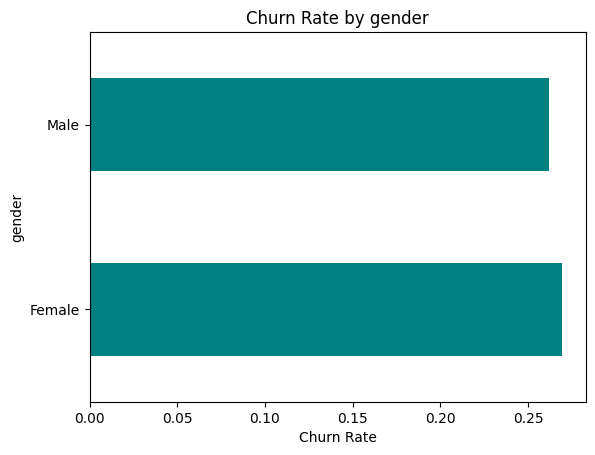

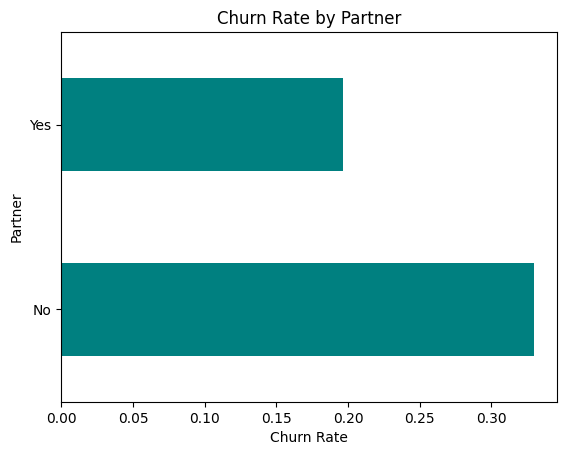

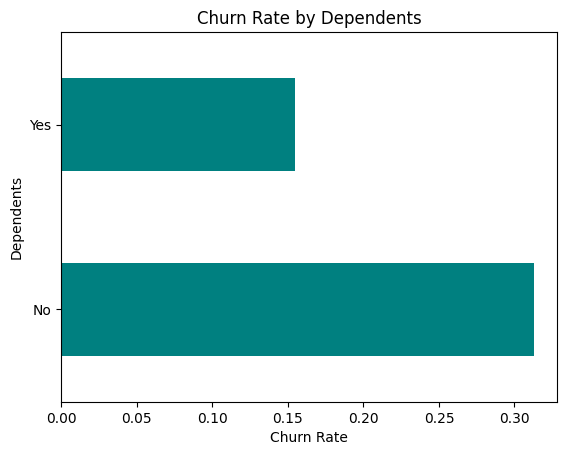

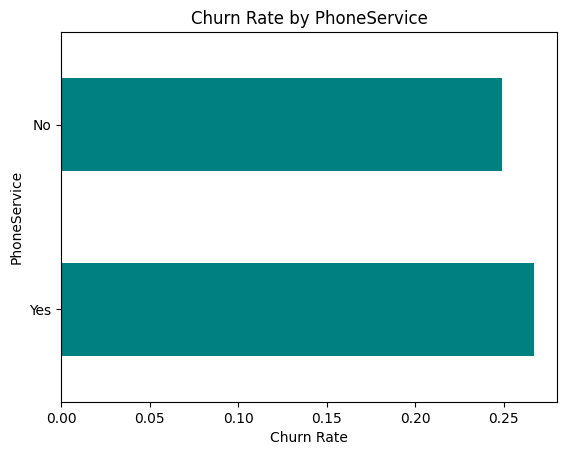

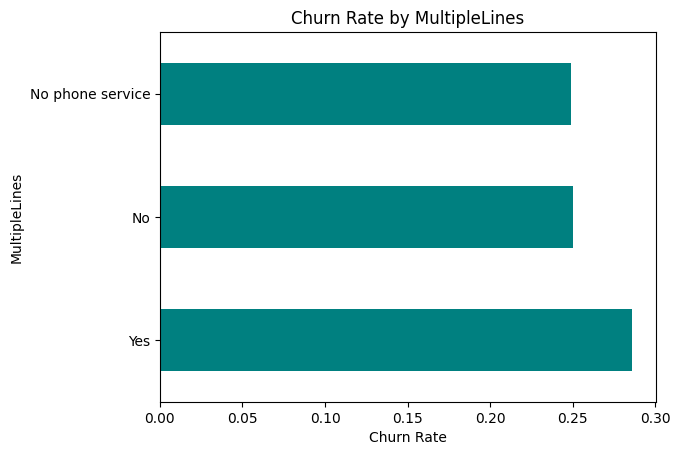

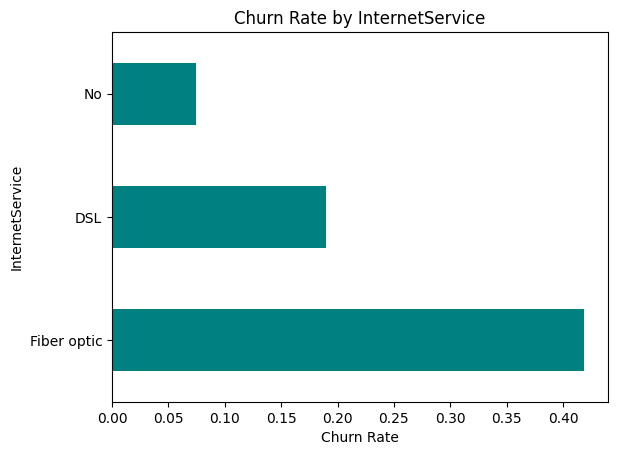

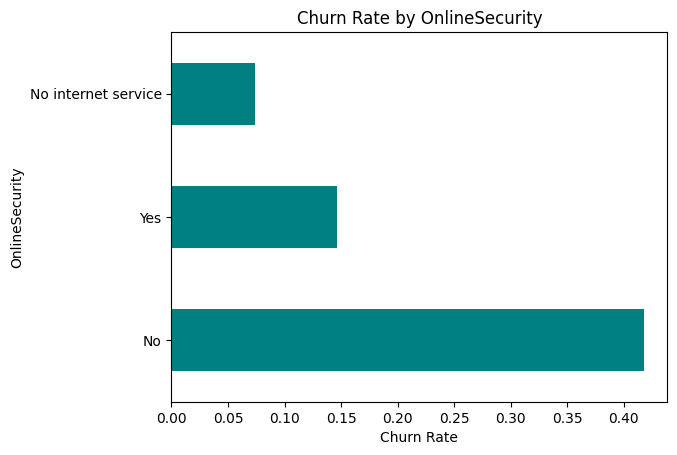

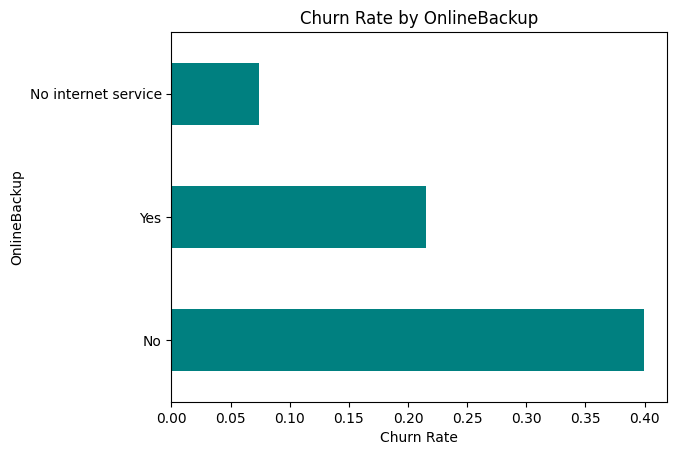

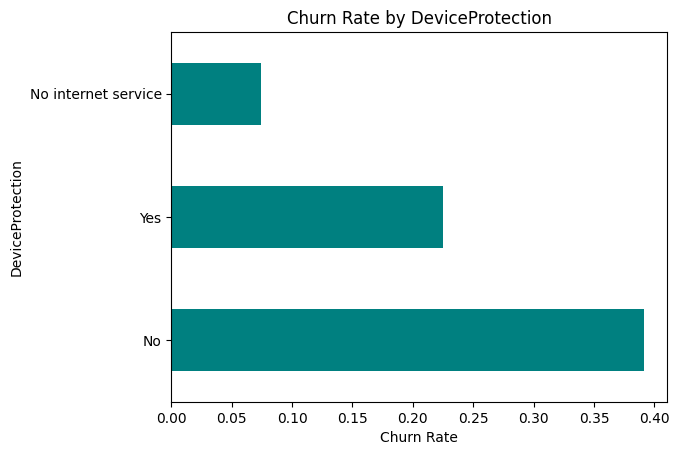

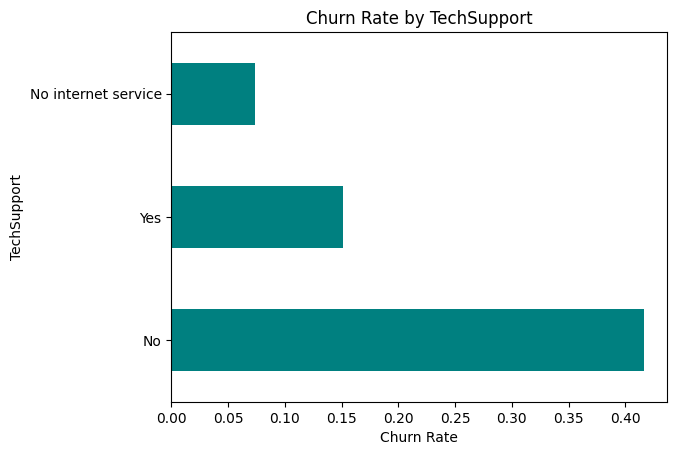

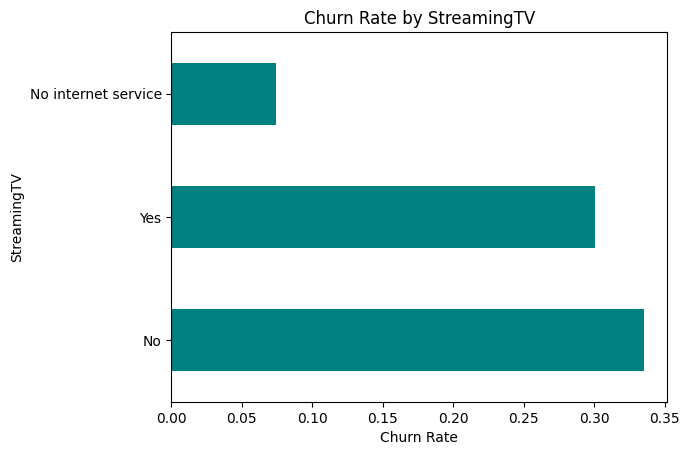

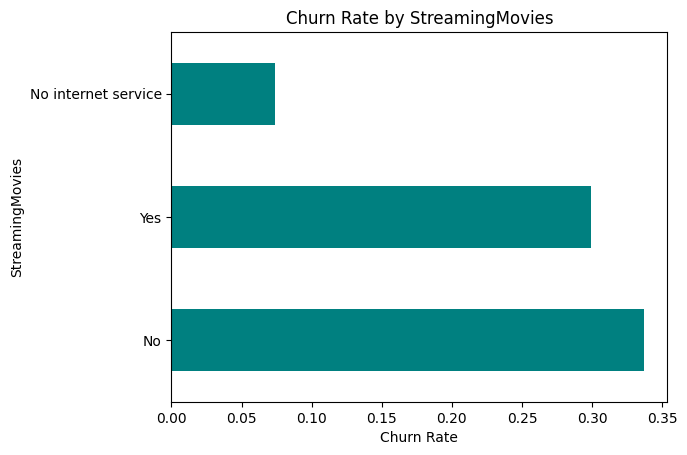

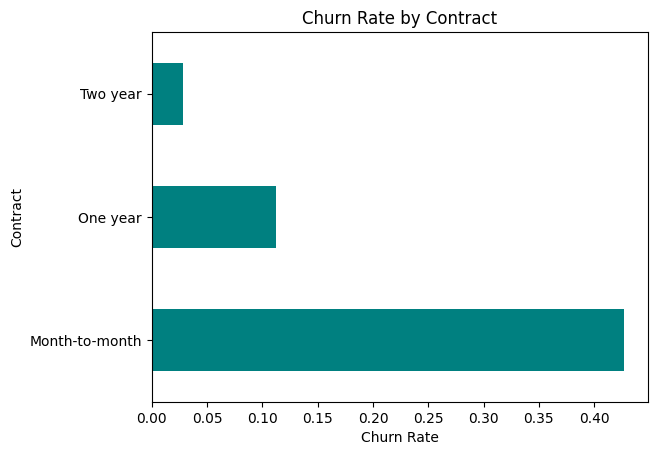

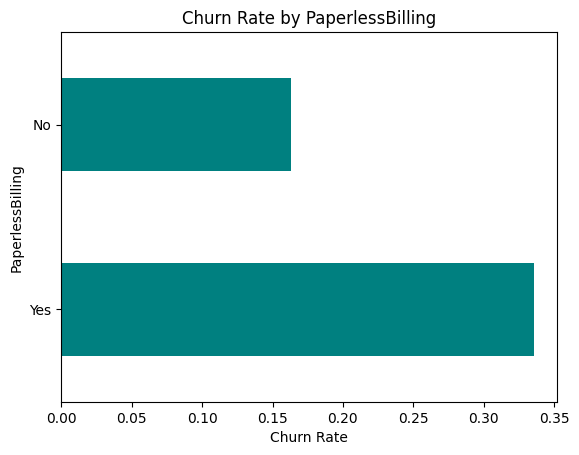

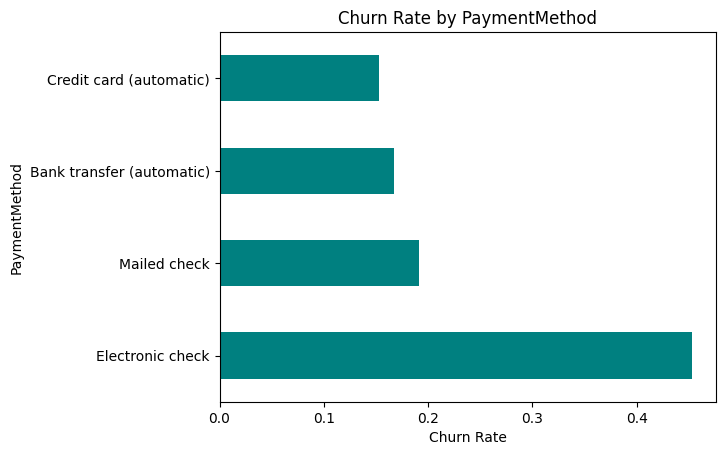

In [9]:
# 6. Bivariate Analysis – Churn vs Features

def churn_rate_plot(col):
    rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    rate.plot(kind='barh', color='teal')
    plt.title(f"Churn Rate by {col}")
    plt.xlabel("Churn Rate")
    plt.show()

for col in cat_features:
    churn_rate_plot(col)


In [10]:
# 7. Correlation & Feature Interactions

# Numerical correlation
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# MonthlyCharges vs TotalCharges colored by Churn
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title("Charges Relationship vs Churn")
plt.show()


ValueError: could not convert string to float: 'Female'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 8. Key Insights & Next Steps
Markdown("""
## 🧠 Key EDA Takeaways

- Customers with **month-to-month contracts**, **electronic checks**, and **fiber optic internet** churn more often.
- Churn is higher for customers with **higher monthly charges**, but not necessarily higher total charges.
- Some features (e.g., gender) show little effect on churn.
- `TotalCharges' had missing/invalid values which were imputed.

## 🔜 Next Steps

- Encode categorical variables
- Scale numerical ones
- Build and evaluate predictive models
- Deploy with a small web app

---
""")



## 🧠 Key EDA Takeaways

- Customers with **month-to-month contracts**, **electronic checks**, and **fiber optic internet** churn more often.
- Churn is higher for customers with **higher monthly charges**, but not necessarily higher total charges.
- Some features (e.g., gender) show little effect on churn.
- `TotalCharges` had missing/invalid values which were imputed.

## 🔜 Next Steps

- Encode categorical variables
- Scale numerical ones
- Build and evaluate predictive models
- Deploy with a small web app

---
